**Mini Project 3 - Twitter Network Analysis by Melih Kurtaran**

In this mini project, Twitter data will be used to analyze the event of Facebook Shutdown on 4th of October.

# **Part 1 - Scrapping Twitter Data by Twint**

There are many ways to scrap data from Twitter. Most popular one is using Twitter's own API however regular developer account gives access to only the tweets that posted in the last week. Therefore, it is not possible to do this project with Twitter API directly. Many libraries tried to scrap the data and the fastest one was Twint so it is used in this project.

In [ ]:
#I am using my own github version because I had fixed some bugs and configured it for me
!pip3 install --user --upgrade git+https://github.com/melihkurtaran/twint

In [ ]:
!pip install nest_asyncio

Facebook shutdown started around 15.45 GMT and the problem persists couple of hours. Therefore, 5 hours period between 15.40 and 20.40 will be examined.

Note: Restart the runtime if it has a problem about finding twint library

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()

# Configure
c = twint.Config()
c.Lang = 'en'
c.Search = "facebook #FacebookDown"
# c.Limit = 10000 #if it is too slow then number of tweets can be limited.
c.Store_csv = True
c.Output = "FacebookDown.csv"
c.Since = "2021-10-04 15:40:00"
c.Until = "2021-10-04 20:40:00"


# Run
twint.run.Search(c)

# **Part 2 - Data Preprocess**

csv file has been created now it will be stored in pandas dataframe

In [ ]:
import pandas as pd

fname = "FacebookDown.csv"
df_tw = pd.read_csv(fname)
df_tw.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1445126577059209217,1445126577059209217,2021-10-04 20:39:59 UTC,2021-10-04,20:39:59,0,855454197185220608,shambacboy,@SHAMBAcboy,NaN,"WhatsApp ,Facebook and IG is down"" Professor: ...",en,[],[],['https://pbs.twimg.com/media/FA4e8oIWQAEnFWe....,1,1,4,"['facebookdown', 'whatsappdown']",[],https://twitter.com/SHAMBAcboy/status/14451265...,False,NaN,1,https://pbs.twimg.com/media/FA4e8oIWQAEnFWe.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1445126576224473092,1445126576224473092,2021-10-04 20:39:59 UTC,2021-10-04,20:39:59,0,19971354,jimbostudios,Jimbo Wilmshurst,NaN,With #facebookdown and #instadown thought to m...,en,[],[],['https://pbs.twimg.com/media/FA4e9XpWUAg7H9z....,0,0,1,"['facebookdown', 'instadown']",[],https://twitter.com/JimboStudios/status/144512...,False,NaN,1,https://pbs.twimg.com/media/FA4e9XpWUAg7H9z.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1445126575477833729,1445126575477833729,2021-10-04 20:39:59 UTC,2021-10-04,20:39:59,0,790784188681039872,manav_dave_24,𝕸𝖆𝖓𝖆𝖛 𝕯𝖆𝖛𝖊,NaN,Social media users right now😭 #MarkZuckerberg ...,en,[],[],['https://pbs.twimg.com/tweet_video_thumb/FA4e...,0,0,2,"['markzuckerberg', 'facebookdown', 'whatsappdo...",[],https://twitter.com/Manav_Dave_24/status/14451...,False,NaN,1,https://pbs.twimg.com/tweet_video_thumb/FA4e8_...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1445126573963845637,1445126573963845637,2021-10-04 20:39:59 UTC,2021-10-04,20:39:59,0,587327719,tomhyoos,Tom Hyoos (IPA: /'tɒm/ /hjuːz/),NaN,Facebook 🤝 Jay Sean #facebookdown https://t....,en,[],[],['https://pbs.twimg.com/media/FA4e9fTXoA4Yl8E....,0,0,1,['facebookdown'],[],https://twitter.com/TomHyoos/status/1445126573...,False,NaN,1,https://pbs.twimg.com/media/FA4e9fTXoA4Yl8E.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1445126573124952071,1445126573124952071,2021-10-04 20:39:58 UTC,2021-10-04,20:39:58,0,460078574,anonymouszhax,🅰🅽🅾🅽🆈🅼🅾🆄🆂🏴,NaN,Is this the cyber pandemic Klaus Schwab told u...,en,[],[],['https://pbs.twimg.com/media/FA4e9UvXEAA9D_W....,0,1,4,"['facebookdown', 'gmaildown', 'instagram', 'wh...",[],https://twitter.com/anonymousZhax/status/14451...,False,NaN,1,https://pbs.twimg.com/media/FA4e9UvXEAA9D_W.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
print("Shape of the dataframe: " + str(df_tw.shape))

Shape of the dataframe: (29733, 36)


In [ ]:
df_tw.describe()

,id,conversation_id,timezone,user_id,place,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,2.973300e+04,2.973300e+04,29733.0,2.973300e+04,0.0,29733.000000,29733.000000,29733.000000,29733.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.445105e+18,1.445018e+18,0.0,6.073559e+17,NaN,0.813574,4.474523,22.343726,0.429657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.309434e+13,8.518241e+15,0.0,6.110799e+17,NaN,20.970848,233.640088,1123.796445,0.495035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.445083e+18,4.373582e+17,0.0,1.656300e+04,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.445092e+18,1.445092e+18,0.0,3.709495e+08,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.445106e+18,1.445106e+18,0.0,7.348998e+17,NaN,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.445117e+18,1.445116e+18,0.0,1.253708e+18,NaN,0.000000,0.000000,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.445127e+18,1.445127e+18,0.0,1.445086e+18,NaN,2700.000000,35075.000000,176392.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for t in df_tw.sample(5)['tweet']:
  print(t)
  print()

Twitter is tearing me to shreds right now about Facebook and Instagram 🤣🤣🤣🤣🤣🤣🤣 #facebookdown #instadown #facebookcrash #instagramdisabled

#Twitter #instagramdown #facebookdown #WhatsAppDown when facebook and instagram goes down. Exactly right now 👇🏻  https://t.co/b33JPfmC25

What mothers couldn't make us do, @Facebook did.  Everyone's gonna sleep on time today.   #facebookdown #instagramdown #WhatsAppDown

Facebook whatsapp are not working .😭 #facebookdown

JUST IN - Data of over 1.5 billion Facebook users is being sold on a popular hacking-related forum. Data contains users’ names, emails, phone numbers, locations, gender, and user ID. #Facebook #facebookdown #DeleteFacebook



# **Part 3 - EDA**

The most Liked Tweets

In [ ]:
mostlike = df_tw.loc[df_tw.likes_count.nlargest(10).index]
mostlike[['username','name','tweet','likes_count','replies_count','retweets_count']]

,username,name,tweet,likes_count,replies_count,retweets_count
27546,snowden,Edward Snowden,Facebook and Instagram go mysteriously offline...,176392,2700,35075
23830,snowden,Edward Snowden,Facebook-owned Whatsapp being down is a remind...,58668,1624,17268
24971,streamerbans,StreamerBans,"❌Social Media Platform ""Facebook"" (@Facebook) ...",33530,492,2766
12936,mazzzoff,IBBY,The best part of WhatsApp Instagram and Facebo...,30176,258,3999
22440,singhlions,Harjinder Singh Kukreja,"This is Twitter after #Instagram, Facebook and...",19510,426,6567
20420,thebabylonbee,The Babylon Bee,"Facebook Suffers Brief Outage, Utopia Breaks O...",6512,103,1254
8683,ericansa,"Chief Erican, MBA",Mark Zuckerberg's personal wealth has dropped ...,6372,246,1704
15362,kipro_hon,Ronoh Cornelius (Kipchumba),Mark Zuckerberg is now number 5 in the billion...,6070,229,1209
15497,shivamchatak,SVM,The best part of WhatsApp Instagram and Facebo...,5363,46,726
8747,mafertovag,Tovar Mafer,"Los humanos tras 4 horas sin Facebook, WhatsAp...",5119,63,1109


In [ ]:
for r in df_tw.loc[df_tw.likes_count.nlargest(10).index]['tweet']:
  print(r)
  print()

Facebook and Instagram go mysteriously offline and, for one shining day, the world becomes a healthier place.   #facebookdown

Facebook-owned Whatsapp being down is a reminder that you and your friends should probably be using a more private, non-profit alternative like @Signalapp anyway (or another open-source app of your choice).   It's just as free, and takes like 30 seconds to switch.  #facebookdown

❌Social Media Platform "Facebook" (@Facebook) has been banned!❌  #facebookdown #ban #firstban 🏄

The best part of WhatsApp Instagram and Facebook going down is Twitter trolling them. LMAO 😭 #facebookdown  https://t.co/drwbo208RZ

This is Twitter after #Instagram, Facebook and Whatsapp are down #whatsappdown #facebookdown  https://t.co/uG0IMZ0wAk

Facebook Suffers Brief Outage, Utopia Breaks Out Around World #FacebookDown  https://t.co/dRzbw9WuRp

Mark Zuckerberg's personal wealth has dropped by nearly $7 billion in a matter of hours, knocking him down a notch on the list of the world's

Top 20 users who tweeted most

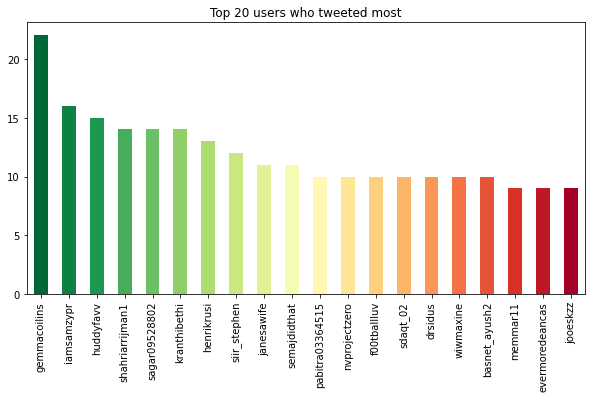

In [ ]:
from matplotlib import cm
import numpy as np
colors = cm.RdYlGn(np.linspace(1,0,20))
df_tw.username.value_counts()[0:20].plot(kind='bar',title="Top 20 users who tweeted most",
                                         figsize=(10,5),color=colors)

The most used words

In [ ]:
!python -m spacy download en_core_web_lg #after that, restrart runtime

Note: If the below code does not compile, then you should run above code and then you need to restart runtime

In [ ]:
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load("en_core_web_lg")
import seaborn as sns

In [ ]:
list_of_sentences = [sentence for sentence in df_tw.tweet]
lines = []
for sentence in list_of_sentences:
  words = sentence.split()
  for w in words:
    lines.append(w)

In [ ]:
#removing the hastags
words_no_hastags = []
for word in lines:
  if word[0] != '#':
    words_no_hastags.append(word)

In [ ]:
#Removing Punctuation
words_no_hastags = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in words_no_hastags]
lines2 = []
for word in words_no_hastags:
    if word != '':
        lines2.append(word)

In [ ]:
from nltk.stem.snowball import SnowballStemmer
#stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” 
s_stemmer = SnowballStemmer(language='english')
stem = []

for word in lines2:
  stem.append(s_stemmer.stem(word))

In [ ]:
#removing the stop words
words = []
for word in stem:
  if word not in nlp.Defaults.stop_words:
    words.append(s_stemmer.stem(word))

In [ ]:
df = pd.DataFrame(words)
df = df[0].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


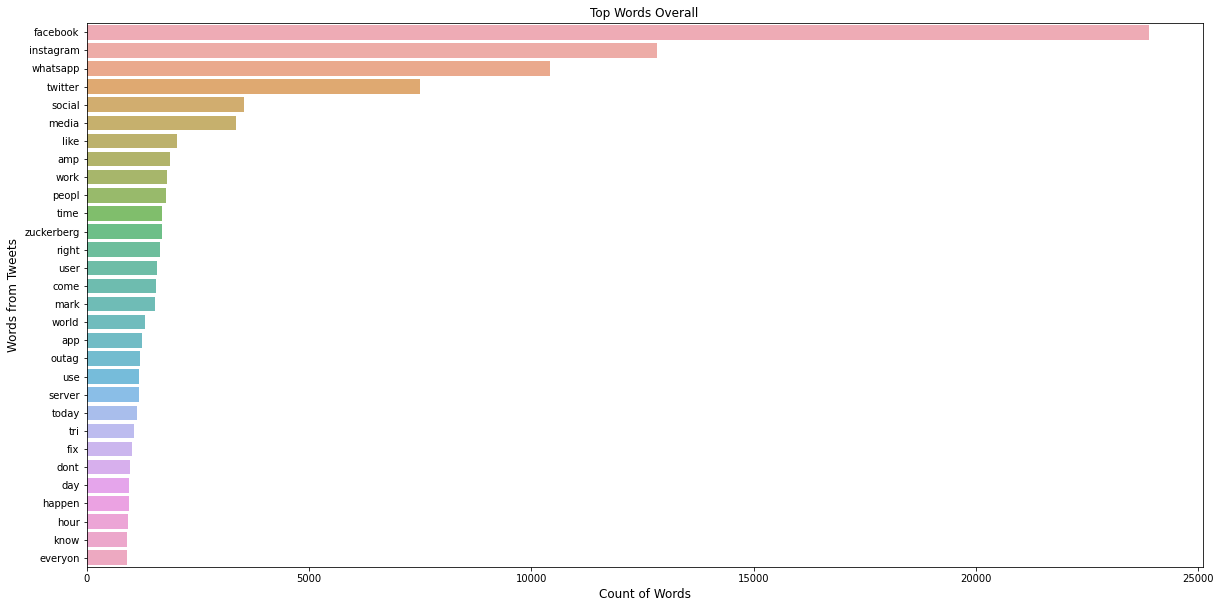

In [ ]:
#This is a simple plot that shows the top 30 words being used
df = df[:30,]
plt.figure(figsize=(20,10))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Words from Tweets', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

WordCloud

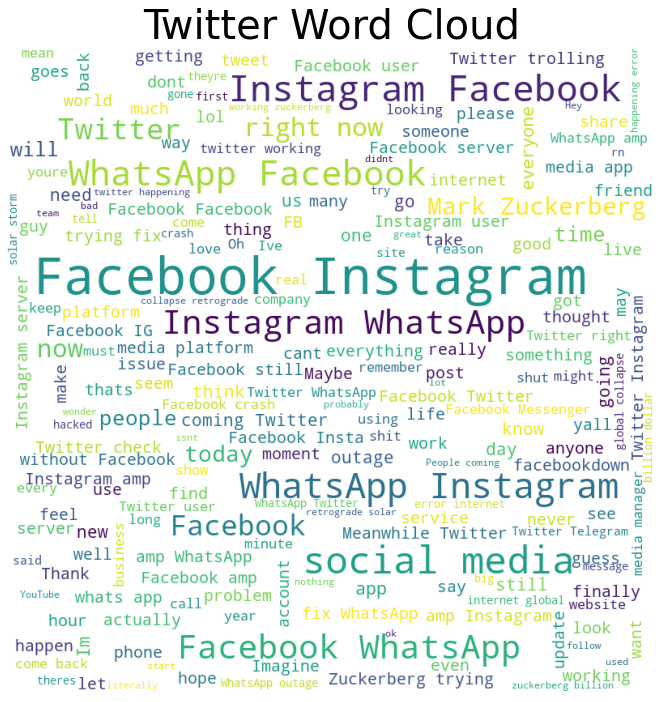

In [ ]:
# importing Word Cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

str1 = " " 
cloud = str1.join(lines2)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(cloud)
 

# plotting the WordCloud images

plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Twitter Word Cloud",fontsize=40)
plt.show()


# **Part 4 - Classify Emotions**

In [ ]:
pip install -U feel-it

In [ ]:
from feel_it import EmotionClassifier, SentimentClassifier

sentiment_classifier = SentimentClassifier()
emotion_classifier = EmotionClassifier()

Downloading:   0%|          | 0.00/847 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

500 tweets with the maximum number of likes and labeling the emotions

In [ ]:
# >>> ['joy', 'fear', 'sadness', 'anger']
df = df_tw.loc[df_tw.likes_count.nlargest(500).index]
df["Emotion"] = emotion_classifier.predict(df["tweet"].values.tolist())

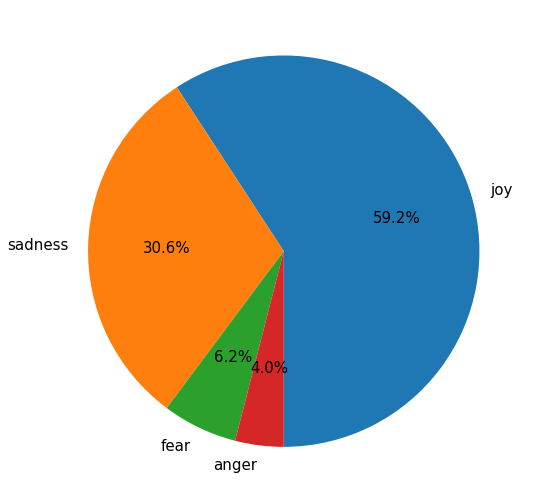

In [ ]:
df.Emotion.value_counts().plot(kind='pie',autopct='%0.1f%%', startangle=270, fontsize=15,label='',figsize=(9,9))

Taking 500 the most liked tweets and labeling them as positive or negative

In [ ]:
df["Positive/Negative"] = sentiment_classifier.predict(df["tweet"].values.tolist())

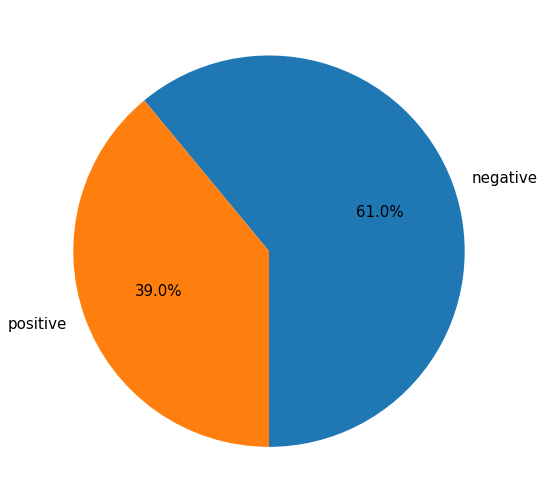

In [ ]:
df["Positive/Negative"].value_counts().plot(kind='pie',autopct='%0.1f%%', startangle=270,
                                            fontsize=15,label='',figsize=(9,9))

# **Part 5 - Network Analysis (Hasthags)**

Hastags are stored as strings so they are transformed to list and edge dataframe created with hastags which they appear together

In [ ]:
import itertools
col1 = []
col2 = []
#the most liked 100 tweets are used
df = df_tw.loc[df_tw.likes_count.nlargest(100).index]
for index, row in df.iterrows():
    s = row['hashtags'].replace(" ", "")
    s = s.replace('\'','')
    hashtags = s[1:-1].split(',')
    hashtags_len = len(hashtags)
    for n in itertools.combinations(hashtags, 2):
        col1.append(n[0])
        col2.append(n[1])
edges = pd.DataFrame(list(zip(col1, col2)))

In [ ]:
edges

,0,1
0,facebookdown,ban
1,facebookdown,firstban
2,ban,firstban
3,instagram,whatsappdown
4,instagram,facebookdown
...,...,...
415,whatsapp,facebookdown
416,whatsapp,instagramdown
417,whatsappdown,facebookdown
418,whatsappdown,instagramdown


In [ ]:
import networkx as nx
G = nx.Graph()


In [ ]:
edges_tuples = [tuple(edges.iloc[i]) for i in range(len(edges))]

In [ ]:
G.add_edges_from(edges_tuples,weight=1)

In [ ]:
print(nx.info(G))

Graph with 42 nodes and 147 edges


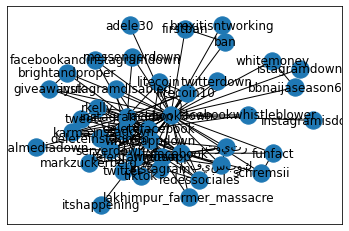

In [ ]:
nx.draw_networkx(G, with_labels=True)

For a better visualization

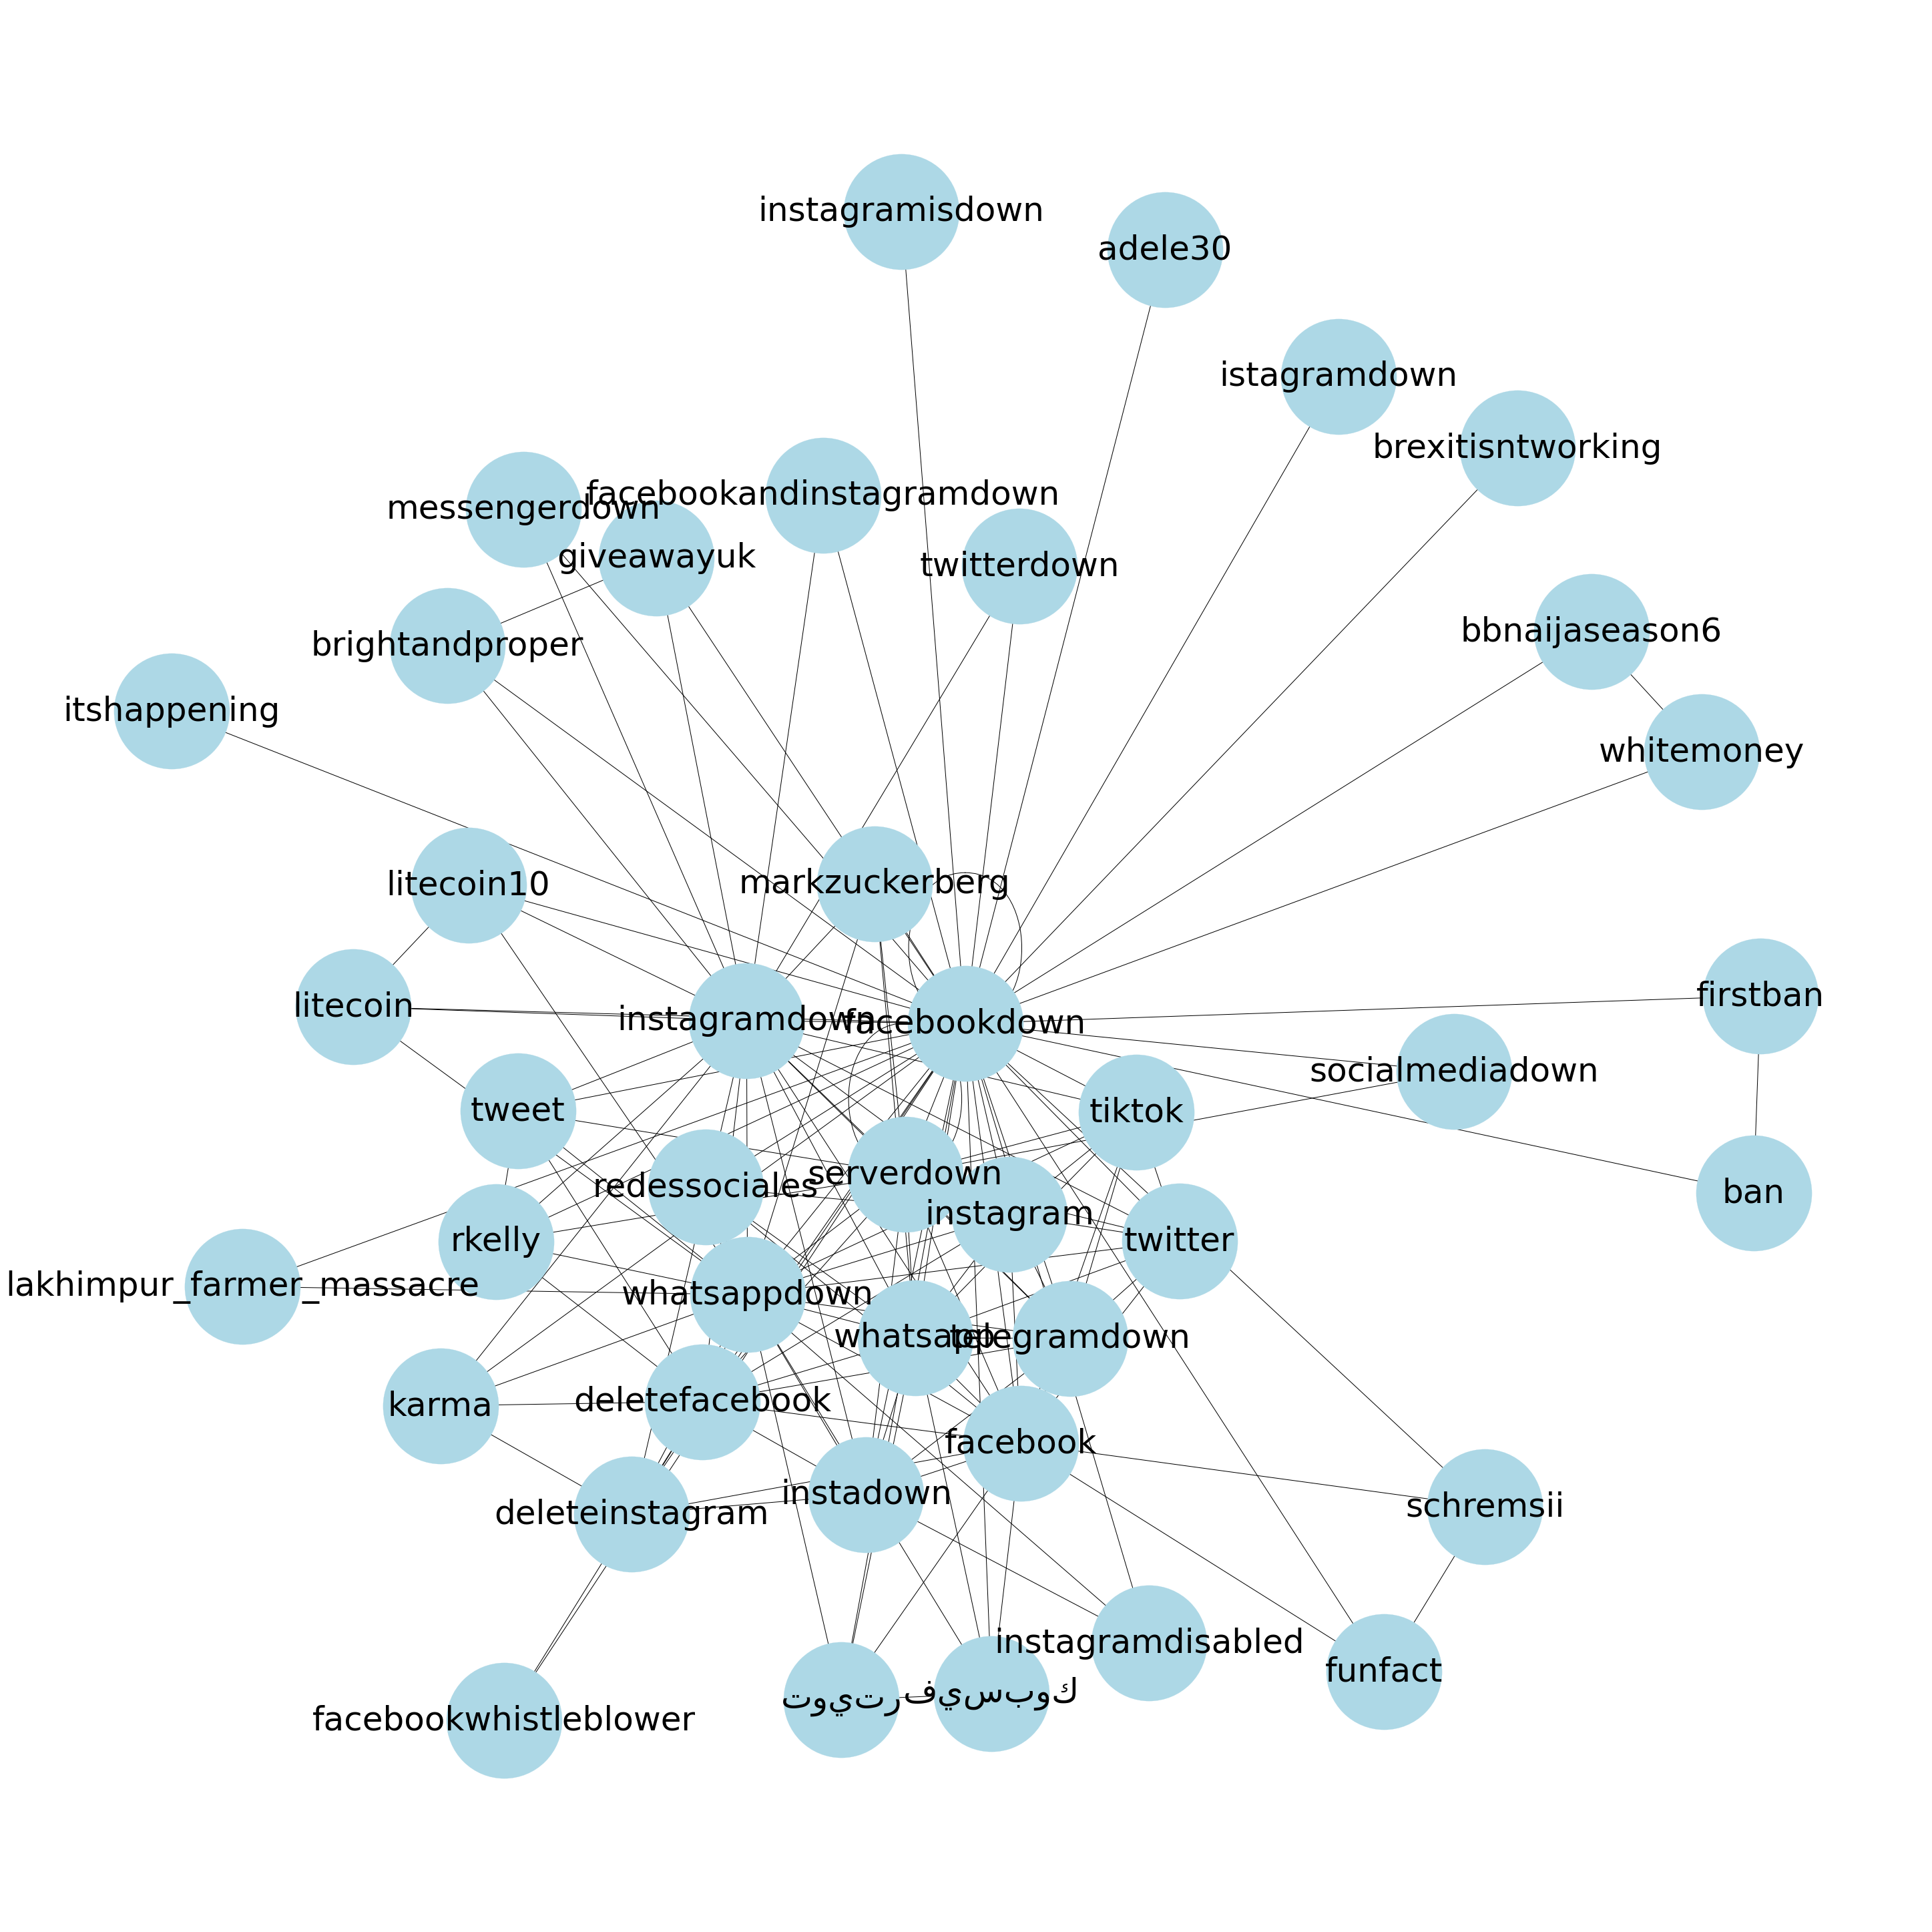

In [ ]:
fig = plt.figure(figsize=(40, 40)) 
nx.draw(G, node_size=30000,font_size=50,with_labels=True,node_color='lightblue', 
    linewidths=0.25) 
plt.axis('equal') 
plt.show() 
#fig.savefig('FacebookHastags.svg') 